## CHAPTER 11
---
# EXTRACTING FEATURES FROM TEXT VARIABLES

---
- Text can be part of the variables in our datasets. 
- For example, in insurance, some variables that capture information about an incident may come from a free text field in a form. 
- In data from a website that collects customer reviews or feedback, we may also encounter variables that contain short descriptions provided by text that has been entered manually by the users. 
- Text is unstructured, that is, it does not follow a pattern, like the tabular pattern of the datasets we have worked with throughout this book. 
- Text may also vary in length and content, and the writing style may be different. 
- How can we extract information from text variables to inform our predictive models? 
- This is the question we are going to address in this chapter.

- The techniques we will cover in this chapter belong to the realm of Natural Language Processing (NLP). 
- NLP is a subfield of linguistics and computer science, concerned with the interactions between computer and human language, or, in other words, how to program computers to understand human language. 
- NLP includes a multitude of techniques to understand the syntax, semantics, and discourse of text, and therefore to do this field justice would require a book in itself.

- In this chapter, instead, we will discuss those techniques that will allow us to quickly extract features from short pieces of text, to complement our predictive models.
- Specifically, we will discuss how to capture text complexity by looking at some statistical parameters of the text such as the word length and count, the number of words and unique words used, the number of sentences, and so on. 
- We will use the pandas and scikit-learn libraries, and we will make a shallow dive into a very useful Python NLP toolkit called Natural Language Toolkit (NLTK).

## 11.1 Counting characters, words, and vocabulary

- One of the salient characteristics of text is its complexity. 
- Long descriptions are more likely to contain more information than short descriptions. 
- Texts rich in different, unique words are more likely to be richer in detail than texts that repeat the same words over and over. 
- In the same way, when we speak, we use many short words such as articles and prepositions to build the sentence structure, yet the main concept is often derived by the nouns and adjectives we use, which tend to be longer words. 
- So, as you can see, even without reading the text, we can start inferring how much information the text provides by determining the number of words, the number of unique words, the lexical diversity, and the length of those words. 
- In this section, we will learn how to extract these features from a text variable using Pandas.

#### Getting ready...
We mentioned that longer descriptions, more words in the article, a greater variety of unique words, and longer words, tend to correlate with the amount of information the article provides. Hence, we can capture text complexity by extracting the following information:
- The total number of characters in the text
- The total number of words
- The total number of unique words
- Lexical diversity = total number of words / number of unique words
- Word average length = number of characters / number of words

In [1]:
import pandas as pd

from sklearn.datasets import fetch_20newsgroups

In [2]:
# load text data
data = fetch_20newsgroups(subset='train')
df = pd.DataFrame(data.data, columns=['text'])
df.head()

,text
0,From: lerxst@wam.umd.edu (where's my thing)\nS...
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...


#### Counting number of characters

In [3]:
df['num_char'] = df['text'].str.len()

df.head()

,text,num_char
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,721
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,858
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,1981
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,815
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,1120


In [4]:
# same but removing trailing white spaces
df['num_char'] = df['text'].str.strip().str.len()

df.head()

,text,num_char
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,716
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,857
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,1980
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,814
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,1117


#### Counting number of words

In [5]:
df['num_words'] = df['text'].str.split().str.len()

df.head()

,text,num_char,num_words
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,716,123
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,857,123
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,1980,339
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,814,113
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,1117,171


In [6]:
# same but removing trailing white spaces
df['num_words'] = df['text'].str.strip().str.split().str.len()

df.head()

,text,num_char,num_words
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,716,123
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,857,123
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,1980,339
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,814,113
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,1117,171


#### Determine vocabulary

In [7]:
df['num_vocab'] = df['text'].str.split().apply(set).str.len()

df.head()

,text,num_char,num_words,num_vocab
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,716,123,96
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,857,123,103
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,1980,339,220
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,814,113,97
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,1117,171,140


In [8]:
# setting charaters to lower case before counting unique words
df['num_vocab'] = df['text'].str.lower().str.split().apply(set).str.len()

df.head()

,text,num_char,num_words,num_vocab
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,716,123,93
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,857,123,99
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,1980,339,219
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,814,113,96
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,1117,171,139


#### Lexical diversity

In [9]:
df['lexical_div'] = df['num_words'] / df['num_vocab']

df.head()

,text,num_char,num_words,num_vocab,lexical_div
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,716,123,93,1.322581
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,857,123,99,1.242424
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,1980,339,219,1.547945
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,814,113,96,1.177083
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,1117,171,139,1.230216


#### Average words length

In [10]:
df['ave_word_length'] = df['num_char'] / df['num_words']

df.head()

,text,num_char,num_words,num_vocab,lexical_div,ave_word_length
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,716,123,93,1.322581,5.821138
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,857,123,99,1.242424,6.967480
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,1980,339,219,1.547945,5.840708
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,814,113,96,1.177083,7.203540
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,1117,171,139,1.230216,6.532164


#### There is more...

Let's explore how the distribution of the created features varies across the different topics the text refers to.

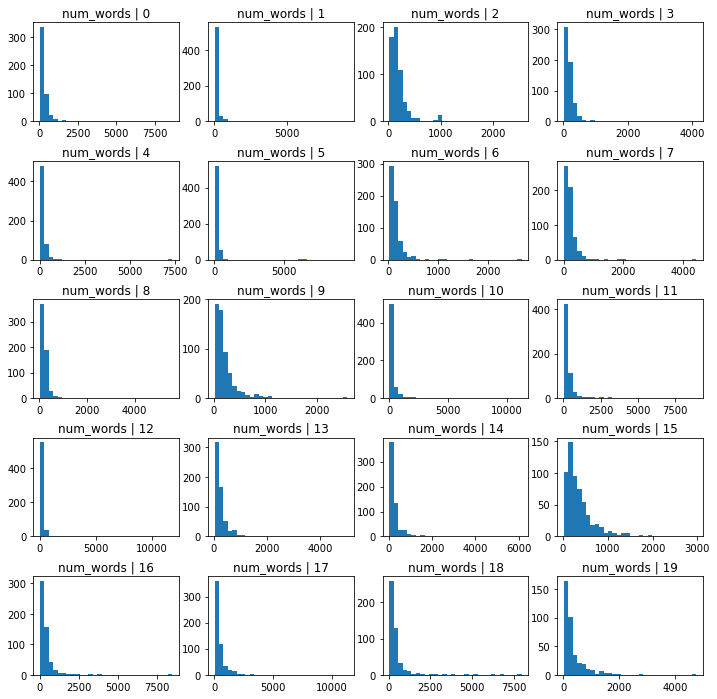

In [11]:
import matplotlib.pyplot as plt

df['target'] = data.target

def plot_features(df, text_var):

    # function plots 9 images
    nb_rows = 5
    nb_cols = 4
    
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(12, 12))
    plt.subplots_adjust(wspace=None, hspace=0.4)

    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            axs[i, j].hist(df[df.target==n][text_var], bins=30)
            axs[i, j].set_title(text_var + ' | ' + str(n))
            n += 1
    plt.show()
    
plot_features(df, 'num_words')

## 11.2 Estimating text complexity by counting sentences

- One aspect of a text we can capture in features is its complexity. 
- Usually, longer descriptions that contain multiple sentences spread over several paragraphs tend to provide more information than descriptions with very few sentences. 
- Therefore, capturing the number of sentences may provide some insight into the amount of information provided by the text. 
- This process is called sentence tokenization. 
- Tokenization is the process of splitting a string into a list of pieces or tokens. 
- In the previous Counting characters, words, and vocabulary section, we did word tokenization, that is, we divided the string into words. 
- In this section, we will divide the string into sentences and then we will count them. 
- We will use the NLTK Python library, which provides this functionality.

In [12]:
import pandas as pd
from nltk.tokenize import sent_tokenize
from sklearn.datasets import fetch_20newsgroups

In [13]:
text = """
A fair number of brave souls who upgraded their SI clock oscillator have
shared their experiences for this poll. Please send a brief message detailing
your experiences with the procedure. Top speed attained, CPU rated speed,
add on cards and adapters, heat sinks, hour of usage per day, floppy disk
functionality with 800 and 1.4 m floppies are especially requested.

I will be summarizing in the next two days, so please add to the network
knowledge base if you have done the clock upgrade and haven't answered this
poll. Thanks.
"""

In [14]:
# separate text into sentences
sent_tokenize(text)

['\nA fair number of brave souls who upgraded their SI clock oscillator have\nshared their experiences for this poll.',
 'Please send a brief message detailing\nyour experiences with the procedure.',
 'Top speed attained, CPU rated speed,\nadd on cards and adapters, heat sinks, hour of usage per day, floppy disk\nfunctionality with 800 and 1.4 m floppies are especially requested.',
 "I will be summarizing in the next two days, so please add to the network\nknowledge base if you have done the clock upgrade and haven't answered this\npoll.",
 'Thanks.']

In [15]:
# count number of sentences
len(sent_tokenize(text))

5

In [16]:
#  now we do the same for an entire dataframe
df.head()

,text,num_char,num_words,num_vocab,lexical_div,ave_word_length,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,716,123,93,1.322581,5.821138,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,857,123,99,1.242424,6.967480,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,1980,339,219,1.547945,5.840708,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,814,113,96,1.177083,7.203540,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,1117,171,139,1.230216,6.532164,14


In [17]:
# take 10 rows to speed things up
df = df.loc[1:10]
df

,text,num_char,num_words,num_vocab,lexical_div,ave_word_length,target
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,857,123,99,1.242424,6.967480,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,1980,339,219,1.547945,5.840708,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,814,113,96,1.177083,7.203540,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,1117,171,139,1.230216,6.532164,14
5,From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)\...,2601,398,230,1.730435,6.535176,16
6,From: bmdelane@quads.uchicago.edu (brian manni...,582,82,72,1.138889,7.097561,13
7,From: bgrubb@dante.nmsu.edu (GRUBB)\nSubject: ...,2833,416,255,1.631373,6.810096,3
8,From: holmes7000@iscsvax.uni.edu\nSubject: WIn...,316,50,44,1.136364,6.320000,2
9,From: kerr@ux1.cso.uiuc.edu (Stan Kerr)\nSubje...,1546,244,170,1.435294,6.336066,4
10,From: irwin@cmptrc.lonestar.org (Irwin Arnstei...,1004,143,115,1.243478,7.020979,8


In [18]:
# remove first part of email
df['text'] = df['text'].str.split('Lines:').apply(lambda x: x[1])
df

,text,num_char,num_words,num_vocab,lexical_div,ave_word_length,target
1,11\nNNTP-Posting-Host: carson.u.washington.ed...,857,123,99,1.242424,6.967480,4
2,"36\n\nwell folks, my mac plus finally gave up...",1980,339,219,1.547945,5.840708,4
3,14\nDistribution: world\nNNTP-Posting-Host: a...,814,113,96,1.177083,7.203540,1
4,23\n\nFrom article <C5owCB.n3p@world.std.com>...,1117,171,139,1.230216,6.532164,14
5,58\n\nIn article <1r1eu1$4t@transfer.stratus....,2601,398,230,1.730435,6.535176,16
6,12\n\nThere were a few people who responded t...,582,82,72,1.138889,7.097561,13
7,44\nDistribution: world\nNNTP-Posting-Host: d...,2833,416,255,1.631373,6.810096,3
8,10\n\nI have win 3.0 and downloaded several i...,316,50,44,1.136364,6.320000,2
9,29\n\njap10@po.CWRU.Edu (Joseph A. Pellettier...,1546,244,170,1.435294,6.336066,4
10,13\n\nI have a line on a Ducati 900GTS 1978 m...,1004,143,115,1.243478,7.020979,8


In [19]:
print(df['text'][1])

 11
NNTP-Posting-Host: carson.u.washington.edu

A fair number of brave souls who upgraded their SI clock oscillator have
shared their experiences for this poll. Please send a brief message detailing
your experiences with the procedure. Top speed attained, CPU rated speed,
add on cards and adapters, heat sinks, hour of usage per day, floppy disk
functionality with 800 and 1.4 m floppies are especially requested.

I will be summarizing in the next two days, so please add to the network
knowledge base if you have done the clock upgrade and haven't answered this
poll. Thanks.

Guy Kuo <guykuo@u.washington.edu>



In [20]:
df['num_sent'] = df['text'].apply(sent_tokenize).apply(len)
df

,text,num_char,num_words,num_vocab,lexical_div,ave_word_length,target,num_sent
1,11\nNNTP-Posting-Host: carson.u.washington.ed...,857,123,99,1.242424,6.967480,4,6
2,"36\n\nwell folks, my mac plus finally gave up...",1980,339,219,1.547945,5.840708,4,9
3,14\nDistribution: world\nNNTP-Posting-Host: a...,814,113,96,1.177083,7.203540,1,7
4,23\n\nFrom article <C5owCB.n3p@world.std.com>...,1117,171,139,1.230216,6.532164,14,10
5,58\n\nIn article <1r1eu1$4t@transfer.stratus....,2601,398,230,1.730435,6.535176,16,21
6,12\n\nThere were a few people who responded t...,582,82,72,1.138889,7.097561,13,8
7,44\nDistribution: world\nNNTP-Posting-Host: d...,2833,416,255,1.631373,6.810096,3,15
8,10\n\nI have win 3.0 and downloaded several i...,316,50,44,1.136364,6.320000,2,3
9,29\n\njap10@po.CWRU.Edu (Joseph A. Pellettier...,1546,244,170,1.435294,6.336066,4,12
10,13\n\nI have a line on a Ducati 900GTS 1978 m...,1004,143,115,1.243478,7.020979,8,11


## 11.3 Creating features with bag-of-words and n-grams

- A bag-of-words (BoW), is a simplified representation of a text that captures the words that are present in the text and the number of times each word appears in the text
- An n-gram is a contiguous sequence of n items in a given text.
- In this section, we will learn how to set words in lowercase, remove stop words, retain words with a minimum acceptable frequency, and capture n-grams all together with one single transformer from scikit-learn, CountVectorizer().

In [21]:
import pandas as pd

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
# load data
data = fetch_20newsgroups(subset='train')
df = pd.DataFrame(data.data, columns=['text'])
df.head()

,text
0,From: lerxst@wam.umd.edu (where's my thing)\nS...
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...


In [23]:
# remove punctuation and numbers
df['text'] = df['text'].str.replace('[^\w\s]','').str.replace('\d+', '')

In [24]:
# set up a bag of words transformer
vectorizer = CountVectorizer(lowercase=True,
                             stop_words='english',
                             ngram_range=(1, 1),
                             min_df=0.05)
# transformer finds the words to be retained
vectorizer.fit(df['text'])

CountVectorizer(min_df=0.05, stop_words='english')

In [25]:
X = vectorizer.transform(df['text'])

# create bago of words dataframe
bagofwords = pd.DataFrame(X.toarray(),
                          columns = vectorizer.get_feature_names())
bagofwords.head()

,able,access,actually,ago,apr,article,articleid,ask,available,away,...,works,world,writes,wrong,wrote,xnewsreader,year,years,yes,youre
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,1,1,0,1,1,0,0,0,0
4,0,0,0,0,0,2,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [26]:
bagofwords.shape

(11314, 191)

In [27]:
# with n grams
vectorizer = CountVectorizer(lowercase=True,
                             stop_words='english',
                             ngram_range=(1, 2),
                             min_df=0.1)
vectorizer.fit(df['text'])

CountVectorizer(min_df=0.1, ngram_range=(1, 2), stop_words='english')

In [28]:
X = vectorizer.transform(df['text'])
bagofwords = pd.DataFrame(X.toarray(),
                          columns = vectorizer.get_feature_names())
bagofwords.head()

,article,believe,better,case,computer,did,distribution,does,doesnt,dont,...,use,used,using,want,way,work,world,writes,writes article,years
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,2,0,1,2,0,2,...,1,0,0,0,1,0,0,0,0,0
3,1,0,0,0,2,0,1,0,0,0,...,0,0,0,0,0,0,1,1,1,0
4,2,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [29]:
vectorizer.get_feature_names()

['article',
 'believe',
 'better',
 'case',
 'computer',
 'did',
 'distribution',
 'does',
 'doesnt',
 'dont',
 'email',
 'going',
 'good',
 'got',
 'help',
 'im',
 'ive',
 'just',
 'know',
 'like',
 'lines',
 'lines article',
 'lines nntppostinghost',
 'make',
 'need',
 'new',
 'nntppostinghost',
 'organization',
 'organization university',
 'people',
 'point',
 'problem',
 'question',
 'read',
 'really',
 'replyto',
 'right',
 'said',
 'say',
 'state',
 'subject',
 'sure',
 'thanks',
 'thing',
 'things',
 'think',
 'time',
 'university',
 'usa',
 'use',
 'used',
 'using',
 'want',
 'way',
 'work',
 'world',
 'writes',
 'writes article',
 'years']

## 11.4 Implementing term frequency-inverse document frequency

- Term Frequency-Inverse Document Frequency (TF-IDF) is a numerical statistic that captures how relevant a word is in a document, with respect to the entire collection of documents.
- TF-IDF is the product of two statistics, term frequency and inverse document frequency.
- Term frequency is, in its simplest form, the count of the word in an individual text.
- The inverse document frequency is a measure of how common the word is across all documents and is usually calculated on a logarithmic scale
- In this section, we will learn how to extract features using TF-IDF with or without n-grams using Scikit-Learn.

In [30]:
import pandas as pd

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
# load data
data = fetch_20newsgroups(subset='train')
df = pd.DataFrame(data.data, columns=['text'])
df.head()

,text
0,From: lerxst@wam.umd.edu (where's my thing)\nS...
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...


In [32]:
# remove punctuation and numbers
df['text'] = df['text'].str.replace('[^\w\s]','').str.replace('\d+', '')

In [33]:
# set up Tf-idf transformer
vectorizer = TfidfVectorizer(lowercase=True,
                             stop_words='english',
                             ngram_range=(1, 1),
                             min_df=0.05)

# learn words to be retained and their frequency
vectorizer.fit(df['text'])

TfidfVectorizer(min_df=0.05, stop_words='english')

In [34]:
X = vectorizer.transform(df['text'])

# create tf-idf dataframe
tfidf = pd.DataFrame(X.toarray(),
                          columns = vectorizer.get_feature_names())
tfidf.head()

,able,access,actually,ago,apr,article,articleid,ask,available,away,...,works,world,writes,wrong,wrote,xnewsreader,year,years,yes,youre
0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.273061,0.00000,0.0
1,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.356467,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0
2,0.0,0.135761,0.123948,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0
3,0.0,0.000000,0.000000,0.0,0.0,0.110029,0.000000,0.0,0.0,0.0,...,0.0,0.169626,0.100560,0.0,0.218186,0.233566,0.0,0.000000,0.00000,0.0
4,0.0,0.000000,0.000000,0.0,0.0,0.262686,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.120039,0.0,0.000000,0.000000,0.0,0.000000,0.26483,0.0


In [35]:
tfidf.shape

(11314, 191)

In [36]:
# with n grams
vectorizer = TfidfVectorizer(lowercase=True,
                             stop_words='english',
                             ngram_range=(1, 2),
                             min_df=0.1)
vectorizer.fit(df['text'])

TfidfVectorizer(min_df=0.1, ngram_range=(1, 2), stop_words='english')

In [37]:
X = vectorizer.transform(df['text'])
tfidf = pd.DataFrame(X.toarray(),
                          columns = vectorizer.get_feature_names())
tfidf.head()

,article,believe,better,case,computer,did,distribution,does,doesnt,dont,...,use,used,using,want,way,work,world,writes,writes article,years
0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.374245
1,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.000000
2,0.000000,0.0,0.186824,0.0,0.349465,0.0,0.142480,0.284082,0.0,0.259019,...,0.153111,0.0,0.0,0.0,0.158168,0.0,0.000000,0.000000,0.00000,0.000000
3,0.168861,0.0,0.000000,0.0,0.555063,0.0,0.226304,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.260325,0.154328,0.30168,0.000000
4,0.329592,0.0,0.000000,0.0,0.000000,0.0,0.220856,0.000000,0.0,0.200751,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.150613,0.00000,0.000000


In [38]:
vectorizer.get_feature_names()

['article',
 'believe',
 'better',
 'case',
 'computer',
 'did',
 'distribution',
 'does',
 'doesnt',
 'dont',
 'email',
 'going',
 'good',
 'got',
 'help',
 'im',
 'ive',
 'just',
 'know',
 'like',
 'lines',
 'lines article',
 'lines nntppostinghost',
 'make',
 'need',
 'new',
 'nntppostinghost',
 'organization',
 'organization university',
 'people',
 'point',
 'problem',
 'question',
 'read',
 'really',
 'replyto',
 'right',
 'said',
 'say',
 'state',
 'subject',
 'sure',
 'thanks',
 'thing',
 'things',
 'think',
 'time',
 'university',
 'usa',
 'use',
 'used',
 'using',
 'want',
 'way',
 'work',
 'world',
 'writes',
 'writes article',
 'years']

## 11.5 Cleaning and stemming text variables

- We are going to use the NLTK stem package to perform word stemming, which incorporates different algorithms to stem words from English and other languages. 
- Each method differs in the algorithm it uses to find the root of the word; therefore, they may output slightly different results.

In [39]:
import pandas as pd

from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from sklearn.datasets import fetch_20newsgroups

In [40]:
# load data
data = fetch_20newsgroups(subset='train')
df = pd.DataFrame(data.data, columns=['text'])
df.head()

,text
0,From: lerxst@wam.umd.edu (where's my thing)\nS...
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...


In [41]:
# print example of text
print(df['text'][10])

From: irwin@cmptrc.lonestar.org (Irwin Arnstein)
Subject: Re: Recommendation on Duc
Summary: What's it worth?
Distribution: usa
Expires: Sat, 1 May 1993 05:00:00 GMT
Organization: CompuTrac Inc., Richardson TX
Keywords: Ducati, GTS, How much? 
Lines: 13

I have a line on a Ducati 900GTS 1978 model with 17k on the clock.  Runs
very well, paint is the bronze/brown/orange faded out, leaks a bit of oil
and pops out of 1st with hard accel.  The shop will fix trans and oil 
leak.  They sold the bike to the 1 and only owner.  They want $3495, and
I am thinking more like $3K.  Any opinions out there?  Please email me.
Thanks.  It would be a nice stable mate to the Beemer.  Then I'll get
a jap bike and call myself Axis Motors!

-- 
-----------------------------------------------------------------------
"Tuba" (Irwin)      "I honk therefore I am"     CompuTrac-Richardson,Tx
irwin@cmptrc.lonestar.org    DoD #0826          (R75/6)
-------------------------------------------------------------------

In [42]:
# remove punctuation
df["text"] = df['text'].str.replace('[^\w\s]','')

# print example without punctuation
print(df['text'][10])

From irwincmptrclonestarorg Irwin Arnstein
Subject Re Recommendation on Duc
Summary Whats it worth
Distribution usa
Expires Sat 1 May 1993 050000 GMT
Organization CompuTrac Inc Richardson TX
Keywords Ducati GTS How much 
Lines 13

I have a line on a Ducati 900GTS 1978 model with 17k on the clock  Runs
very well paint is the bronzebrownorange faded out leaks a bit of oil
and pops out of 1st with hard accel  The shop will fix trans and oil 
leak  They sold the bike to the 1 and only owner  They want 3495 and
I am thinking more like 3K  Any opinions out there  Please email me
Thanks  It would be a nice stable mate to the Beemer  Then Ill get
a jap bike and call myself Axis Motors

 

Tuba Irwin      I honk therefore I am     CompuTracRichardsonTx
irwincmptrclonestarorg    DoD 0826          R756




In [43]:
# alternative way to remove punctuation
import string
df['text'] = df['text'].str.replace('[{}]'.format(string.punctuation), '')
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [44]:
# remove numbers, keep only text
df['text'] = df['text'].str.replace('\d+', '')

# print example without numbers
print(df['text'][10])

From irwincmptrclonestarorg Irwin Arnstein
Subject Re Recommendation on Duc
Summary Whats it worth
Distribution usa
Expires Sat  May   GMT
Organization CompuTrac Inc Richardson TX
Keywords Ducati GTS How much 
Lines 

I have a line on a Ducati GTS  model with k on the clock  Runs
very well paint is the bronzebrownorange faded out leaks a bit of oil
and pops out of st with hard accel  The shop will fix trans and oil 
leak  They sold the bike to the  and only owner  They want  and
I am thinking more like K  Any opinions out there  Please email me
Thanks  It would be a nice stable mate to the Beemer  Then Ill get
a jap bike and call myself Axis Motors

 

Tuba Irwin      I honk therefore I am     CompuTracRichardsonTx
irwincmptrclonestarorg    DoD           R




In [45]:
# put in lower case
df['text'] = df['text'].str.lower()

# print example in lower case
print(df['text'][10])

from irwincmptrclonestarorg irwin arnstein
subject re recommendation on duc
summary whats it worth
distribution usa
expires sat  may   gmt
organization computrac inc richardson tx
keywords ducati gts how much 
lines 

i have a line on a ducati gts  model with k on the clock  runs
very well paint is the bronzebrownorange faded out leaks a bit of oil
and pops out of st with hard accel  the shop will fix trans and oil 
leak  they sold the bike to the  and only owner  they want  and
i am thinking more like k  any opinions out there  please email me
thanks  it would be a nice stable mate to the beemer  then ill get
a jap bike and call myself axis motors

 

tuba irwin      i honk therefore i am     computracrichardsontx
irwincmptrclonestarorg    dod           r




In [46]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [47]:
# remove stop words
def remove_stopwords(text):
    stop = set(stopwords.words('english'))
    text = [word for word in text.split() if word not in stop]
    text = ' '.join(x for x in text)
    return text

# test function on single text
remove_stopwords(df['text'][10])

'irwincmptrclonestarorg irwin arnstein subject recommendation duc summary whats worth distribution usa expires sat may gmt organization computrac inc richardson tx keywords ducati gts much lines line ducati gts model k clock runs well paint bronzebrownorange faded leaks bit oil pops st hard accel shop fix trans oil leak sold bike owner want thinking like k opinions please email thanks would nice stable mate beemer ill get jap bike call axis motors tuba irwin honk therefore computracrichardsontx irwincmptrclonestarorg dod r'

In [48]:
# apply function to entire dataframe (this operation takes a while)
df['text'] = df['text'].apply(remove_stopwords)

# print example text without stopwords
print(df['text'][10])

irwincmptrclonestarorg irwin arnstein subject recommendation duc summary whats worth distribution usa expires sat may gmt organization computrac inc richardson tx keywords ducati gts much lines line ducati gts model k clock runs well paint bronzebrownorange faded leaks bit oil pops st hard accel shop fix trans oil leak sold bike owner want thinking like k opinions please email thanks would nice stable mate beemer ill get jap bike call axis motors tuba irwin honk therefore computracrichardsontx irwincmptrclonestarorg dod r


In [49]:
# Stemming
# http://www.nltk.org/howto/stem.html
# for other stemmers
stemmer = SnowballStemmer("english")

# test stemmer in one word
stemmer.stem('running')

'run'

In [50]:
def stemm_words(text):
    text = [stemmer.stem(word) for word in text.split()]
    text = ' '.join(x for x in text)
    return text

# test function on single text
stemm_words(df['text'][10])

'irwincmptrclonestarorg irwin arnstein subject recommend duc summari what worth distribut usa expir sat may gmt organ computrac inc richardson tx keyword ducati gts much line line ducati gts model k clock run well paint bronzebrownorang fade leak bit oil pop st hard accel shop fix tran oil leak sold bike owner want think like k opinion pleas email thank would nice stabl mate beemer ill get jap bike call axi motor tuba irwin honk therefor computracrichardsontx irwincmptrclonestarorg dod r'

In [51]:
# stem entire dataframe
df['text'] = df['text'].apply(stemm_words)

# print example with stemmed words
print(df['text'][10])

irwincmptrclonestarorg irwin arnstein subject recommend duc summari what worth distribut usa expir sat may gmt organ computrac inc richardson tx keyword ducati gts much line line ducati gts model k clock run well paint bronzebrownorang fade leak bit oil pop st hard accel shop fix tran oil leak sold bike owner want think like k opinion pleas email thank would nice stabl mate beemer ill get jap bike call axi motor tuba irwin honk therefor computracrichardsontx irwincmptrclonestarorg dod r
